In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('data/Fish.csv')  # 데이터 불러오기
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [14]:
cond = df['Species'] == 'Perch'   # 종이 perch인 애들만 빼서 perch_data라는 곳에 저장.
perch_data = df.loc[cond]
# perch_data

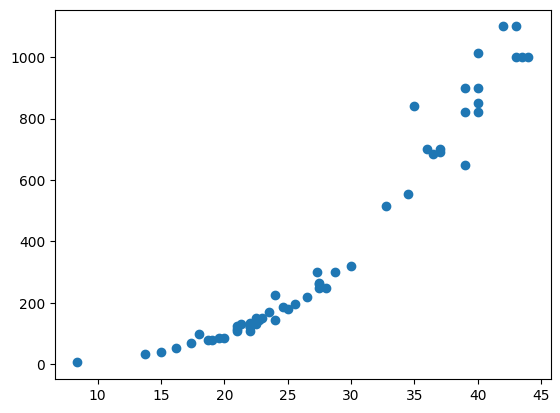

In [15]:
import matplotlib.pyplot as plt   # 그래프 불러오기

plt.scatter(perch_data['Length2'], perch_data['Weight'])

In [16]:
from sklearn.model_selection import train_test_split   # 불러오기

In [17]:
train_input, test_input, train_target, test_target = \
train_test_split(perch_data[['Length2']], perch_data[['Weight']] )  ## [[]] 2차원 배열 만들어줌

In [18]:
# train_input.head()  # 학습 시키기

In [19]:
from sklearn.neighbors import KNeighborsRegressor  # regression을 하기 위한 도구 불러오기

In [20]:
knr = KNeighborsRegressor()   
knr.fit(train_input, train_target)  # 2차원으로 만들어 준거 학습시키기

KNeighborsRegressor()

In [30]:
knr.score(test_input, test_target) # 학습할때 넣었던 데이터, 출력값이 높을수록 좋다.

0.07912243923030471

In [31]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
# print(test_input, test_prediction)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

323.79857142857145


In [32]:
knr.score(train_input, train_target)  # 학습할때 넣었던 데이터, 출력값이 높을수록 좋다.

0.11813076289733138

In [28]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9829182170661646
0.9601178872192246


C:\Users\1-01\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\1-01\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\1-01\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\1-01\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


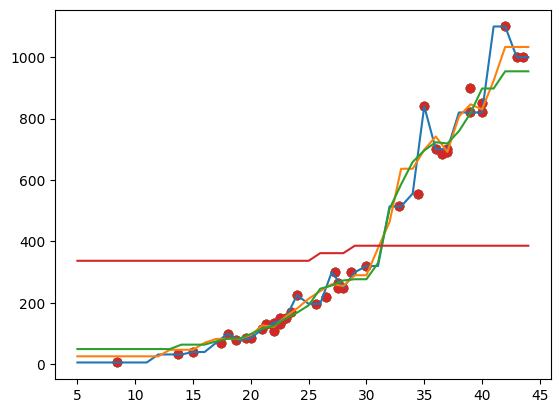

In [29]:
import numpy as np
knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 3, 5, 40]:
    knr.n_neighbors = n 
    knr.fit(train_input, train_target)

    prediction = knr.predict(x)

    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)